 # Exploring the History of Lego
 ## Introduction  
<ul>
 </ul> 
 <ul>
 </ul>
   <div style="font-size:18px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:18px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>

### The analysis questions of the project are:

<p>1. What percentage of all licensed sets ever released were Star Wars themed? The answer should be saved as a variable the_force in the form of an integer (e.g. 25).</p>
<p>2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)? The answer should be saved as a variable new_era in the form of an integer (e.g. 2012).</p>

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import dataset
lego_sets = pd.read_csv('./datasets/lego_sets.csv')
parent_themes = pd.read_csv('./datasets/parent_themes.csv')

In [3]:
# A quick preview of the columns, contained in the datasets
print('Lego sets preview:'+'\n')
print(lego_sets.info(), '\n')
print('Parent themes preview:'+'\n')
parent_themes.info()

Lego sets preview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3   num_parts     6926 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11986 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB
None 

Parent themes preview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           111 non-null    int64 
 1   name         111 non-null    object
 2   is_licensed  111 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 2.0+ KB


There are missing values in the lego_sets dataset for five variables - set_num, name, year, num_parts, theme_name.

In [4]:
# Show the first 5 rows of dataset lego_sets.
lego_sets.head(4)

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [5]:
# Show the first 5 rows of parent_themes.
parent_themes.head(4)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False


In [6]:
# Preview some of the rows that do not have values for set_num
lego_sets[lego_sets['set_num'].isna()].head()

,set_num,name,year,num_parts,theme_name,parent_theme
11833,NaN,NaN,2017,347.0,NaN,Disney Princess
11834,NaN,NaN,2016,70.0,NaN,Disney Princess
11835,NaN,NaN,2016,NaN,NaN,Disney Princess
11836,NaN,NaN,2017,304.0,NaN,Super Heroes
11837,NaN,NaN,2017,196.0,NaN,Super Heroes


In [7]:
# Delete all rows with missing values for the variable set_num because it will be used in the subsequent analysis.
mod_lego_sets = lego_sets.dropna(axis = 'rows', subset=['set_num'])

In [8]:
# The next step is to find out which Lego sets are licensed.
# Merge the two datasets on the variables parent_theme and name using inner join.
tables_merged = mod_lego_sets.merge(parent_themes,
                                    left_on = 'parent_theme', 
                                    right_on = 'name',
                                    suffixes = ['_sets', '_parent'])

# Print out information about the new DataFrame.
tables_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11833 entries, 0 to 11832
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name_sets     11833 non-null  object 
 2   year          11833 non-null  int64  
 3   num_parts     6835 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11833 non-null  object 
 6   id            11833 non-null  int64  
 7   name_parent   11833 non-null  object 
 8   is_licensed   11833 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 843.6+ KB


In [9]:
# Keep only the rows with licensed sets
subset_is_licensed = tables_merged[tables_merged['is_licensed']]

# A preview of the subset
subset_is_licensed.head()

,set_num,name_sets,year,num_parts,theme_name,parent_theme,id,name_parent,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,Star Wars,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,Star Wars,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,Star Wars,True


## First possible solution to the first question of the project:

In [10]:
# Calculate the percentage of Star Wars themed sets to all licensed sets ever released
# Create a Series of Boolean values for every Star Wars parent theme.
is_star_wars = subset_is_licensed['parent_theme']=='Star Wars'

the_force = int(round(is_star_wars.mean(),2) * 100)
the_force

52

## Second possible solution to the first question of the project:

In [11]:
star_wars_sets = len(subset_is_licensed[subset_is_licensed['parent_theme'] == 'Star Wars'])

all_sets = len(subset_is_licensed)

ratio = star_wars_sets / all_sets 

the_force = int(round(ratio, 2) * 100)
the_force

52

## First possible solution to the second question of the project:

In [12]:
# In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)?
# Create a pivot table with the number of sets released every year for every theme.
pivot = subset_is_licensed.pivot_table(values = 'set_num', 
                                       columns = 'parent_theme', 
                                       index = 'year', 
                                       aggfunc = 'count')
pivot.head()

parent_theme,Angry Birds,Avatar,Ben 10,Cars,Disney,Disney Princess,Disney's Mickey Mouse,Ghostbusters,Harry Potter,Indiana Jones,...,Pirates of the Caribbean,Prince of Persia,Scooby-Doo,SpongeBob SquarePants,Star Wars,Super Heroes,Teenage Mutant Ninja Turtles,The Hobbit and Lord of the Rings,The Lone Ranger,Toy Story
year,,,,,,,,,,,,,,,,,,,,,
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,28.0,3.0,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,32.0,5.0,NaN,NaN,NaN,NaN


In [13]:
# Find the maximal number of sets from a theme released every year.
max_per_year = pivot.max(axis = 'columns')
max_per_year

year
1999    13.0
2000    26.0
2001    14.0
2002    28.0
2003    32.0
2004    20.0
2005    28.0
2006    11.0
2007    16.0
2008    23.0
2009    39.0
2010    30.0
2011    32.0
2012    43.0
2013    35.0
2014    45.0
2015    58.0
2016    61.0
2017    72.0
dtype: float64

In [14]:
# Filter the column Star Wars for rows where the number of sets is lower than the highest number for the corresponding year.
filtered_pivot = pivot[pivot['Star Wars'] < max_per_year]
filtered_pivot

parent_theme,Angry Birds,Avatar,Ben 10,Cars,Disney,Disney Princess,Disney's Mickey Mouse,Ghostbusters,Harry Potter,Indiana Jones,...,Pirates of the Caribbean,Prince of Persia,Scooby-Doo,SpongeBob SquarePants,Star Wars,Super Heroes,Teenage Mutant Ninja Turtles,The Hobbit and Lord of the Rings,The Lone Ranger,Toy Story
year,,,,,,,,,,,,,,,,,,,,,
2017,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,55.0,72.0,NaN,NaN,NaN,NaN


In [15]:
# Save the year when Star Wars didn't have the highest number of sets in the variable new_era.
new_era = int(filtered_pivot.index[0])
new_era

2017

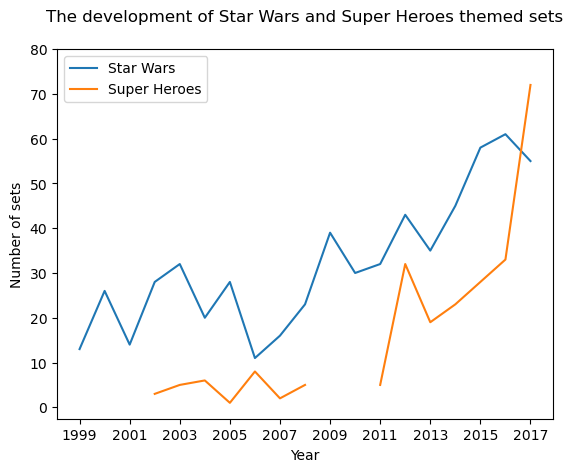

In [16]:
# In 2017 the Super Heroes themed sets were more than the Star Wars themed ones.
# Show the development of the number of the Star Wars and Super Heroes themed sets.
pivot_subset = pivot.loc[:, ('Star Wars', 'Super Heroes')]

pivot_subset.plot(kind='line')
plt.xticks(range(1999, 2018, 2))
plt.yticks(range(0, 85 , 10))

plt.ylabel('Number of sets')
plt.xlabel('Year')
plt.title('The development of Star Wars and Super Heroes themed sets', pad = 20)
plt.legend(['Star Wars', 'Super Heroes'])

plt.show()

## Second possible solution to the second question of the project:

In [17]:
# Use .groupby() to check which theme was the most popular each year.
most_popular_sets = subset_is_licensed.groupby('year')['parent_theme'].agg(pd.Series.mode)
most_popular_sets

year
1999       Star Wars
2000       Star Wars
2001       Star Wars
2002       Star Wars
2003       Star Wars
2004       Star Wars
2005       Star Wars
2006       Star Wars
2007       Star Wars
2008       Star Wars
2009       Star Wars
2010       Star Wars
2011       Star Wars
2012       Star Wars
2013       Star Wars
2014       Star Wars
2015       Star Wars
2016       Star Wars
2017    Super Heroes
Name: parent_theme, dtype: object

In [18]:
new_era = int(most_popular_sets[most_popular_sets != 'Star Wars'].index[0])
new_era

2017